In [17]:

import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


# Task 1: Identify one or more suitable web APIs
API Chosen: FBI CRIME DATA API from https://crime-data-explorer.fr.cloud.gov/api 
We can get an API by signing up with email id. The API i received has been passed as key along with url in below code.
After going through their data dictionary I have specifically chosen the Victim Demographic data which shows the relationship of the victom to the offender for a particular year for a homicide offense. I believe some interesting insights could be gained from this data.

# Task 2: Collect data from your chosen API(s)

In [18]:
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide-offenses/victim/national/relationship?api_key=JizKB0HAKZHaItIzgfxZD5ExOL6724SANrKd6igQ"
headers = {
    'Content-Type': "application/csv"
    }

response = requests.request("GET", url, headers=headers)
data = response.json()
print(response)

<Response [200]>


# Task 3: Parse the collected data, and store it in an appropriate file format
The following code retreives the raw data using the above Functions from the API and writes it to a CSV file.

In [19]:
df = pd.DataFrame(data['results'])
df.to_csv(r"sample.csv",index=False);

# Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data
I have loaded the data into a data frame whilst using the year as the index column for easy processing in further steps.

In [20]:
crime_data = pd.read_csv('sample.csv',index_col="data_year")
crime_data=crime_data.sort_values(by=['data_year'])
print(crime_data[0:5])

           acquaintance  babysittee  boyfriend_girlfriend  child  \
data_year                                                          
1991                  1           0                     0      0   
1991                  2           0                     1      1   
1991                354           0                    82     20   
1992                  2           1                     0      1   
1992                262           0                    39     26   

           child_boyfriend_girlfriend  common_law_spouse  employee  employer  \
data_year                                                                      
1991                                0                  0         0         0   
1991                                0                  0         0         0   
1991                                0                 11         3         2   
1992                                0                  0         0         0   
1992                                1      

Checking for missing values in data

In [21]:
crime_data.isnull().sum()

acquaintance                  0
babysittee                    0
boyfriend_girlfriend          0
child                         0
child_boyfriend_girlfriend    0
common_law_spouse             0
employee                      0
employer                      0
ex_spouse                     0
friend                        0
grandchild                    0
grandparent                   0
homosexual_relationship       0
in_law                        0
neighbor                      0
offender                      0
other_family_member           0
otherwise_known               0
parent                        0
relationship_unknown          0
sibling                       0
spouse                        0
stepchild                     0
stepparent                    0
stepsibling                   0
stranger                      0
dtype: int64

The final Pre-processing step I have done is to select only the top 5 relationships for further analysis

In [22]:
order = crime_data.sum().sort_values(inplace=False,ascending=False)

crime_data=crime_data.ix[:,order.index[:5]]

# Task 5: Analyse and summarise the cleaned dataset
The following step is to sum up the victim numbers for each unique year for better visualization

In [23]:
crime_data = crime_data.groupby("data_year").sum()
print(crime_data)

           relationship_unknown  acquaintance  stranger  otherwise_known  \
data_year                                                                  
1991                        132           357       292               22   
1992                        207           265       228                7   
1993                        171           285       182               42   
1994                        206           250       217               40   
1995                        122           210       143               19   
1996                        178           260       174               29   
1997                        237           289       259               60   
1998                        309           396       228               60   
1999                        430           434       245              111   
2000                        677           500       419              128   
2001                        777           573       430              164   
2002        

At just a cursory glance we can see that crimes for all types of relationships have increased over the years.
We will now create some visualizations out of the data for more analysis.

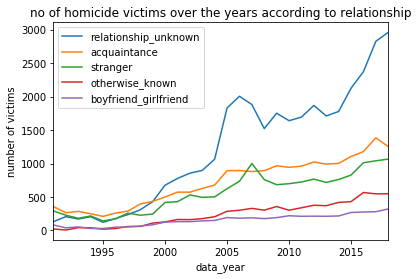

In [24]:
plot=crime_data.plot(title="no of homicide victims over the years according to relationship")
plot.set_ylabel("number of victims")
plot.set_xlim(1991,2018)
plot

We can see that throught the graph too that the  number of victims have continuously increased over the years.
We can also see that most lines have a high rise between 2005-2010. This could be a useful starting point for the FBI to look into the national situation during that time to try and understand why the cases must have risen. If one is able to get data related to the economic crisis of 2008 we might be able to do some corelation analysis.

Now, let's take a look at two of the relationships-stranger and acquaintance. 

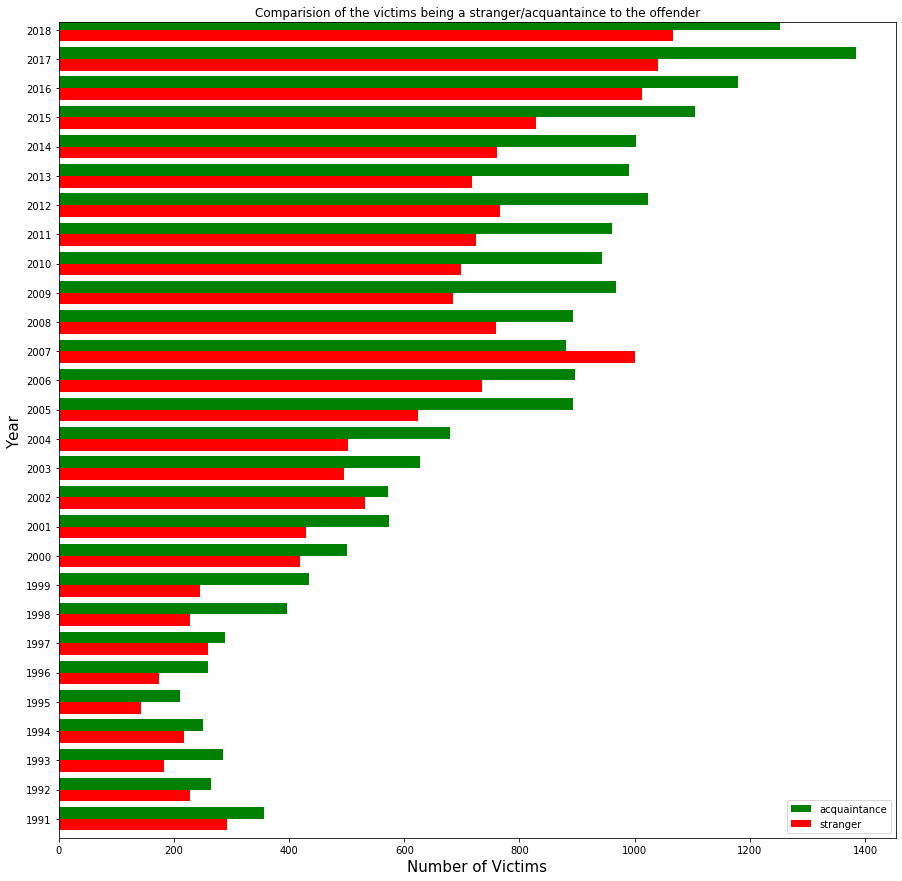

In [25]:
df1 = crime_data['acquaintance']
df2 = crime_data['stranger']
fig = plt.figure()
ax=fig.add_subplot(111)
width = 0.4
df1.plot(kind='barh', color='green', ax=ax, width=width, position=0,figsize=(15,15),legend="acquaintance")
df2.plot(kind='barh', color='red', ax=ax, width=width, position=1,figsize=(15,15),legend="stranger")
ax.set_xlabel("Number of Victims", fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_yticklabels(df1.index)
plt.title("Comparision of the victims being a stranger/acquantaince to the offender")
plt.show()

We can see that mostly over the years that more number of victim were murdered by strangers rather than acquaintances except for the year 2007. It's interesting to wonder what incidents in 2007 year might have resulted in this change in pattern. More analysis into 2007 detailed data might give us better insights.

Now let's also try to see throughout the years what kind of relationships with the victims have been more prominent.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDFB9B76D8>],
      dtype=object)

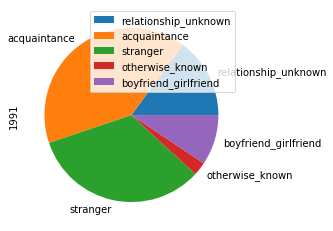

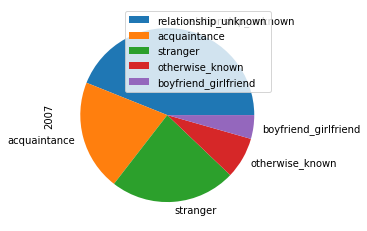

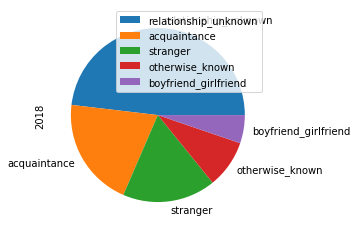

In [26]:
df_pie = crime_data[(crime_data.index==1991)]
x=df_pie.T.plot(kind="pie",subplots=True)
x

df_pie = crime_data[(crime_data.index==2007)]
df_pie.T.plot.pie(subplots=True)

df_pie = crime_data[(crime_data.index==2018)]
df_pie.T.plot.pie(subplots=True)

It's interesting to note how over the years the percentage of the victims being an acquaintance has decreased. But since the other bigger percentage refers to - relationship_unkown we cannot say with certainty. One would have to look deeper into how the FBI defines the relationship as unknown in their cases.

Many such interesting patterns and insights can be gained through data analysis using python.